In [1]:
import numpy as np
import pandas as pd
from os import listdir
import matplotlib.pyplot as plt

In [2]:
dirs = listdir("Speeches")

In [3]:
df = pd.DataFrame([], columns = ["Name", "Content"])
df

,Name,Content


In [4]:
for i, file in enumerate(dirs):
    with open('Speeches/' + file, 'r', encoding = 'utf-8') as f:
        df.at[i,"Content"] = f.readlines()[0]
        df.at[i,"Name"] = file.split(".")[0]

In [5]:
# df["year"] = df['Name'].apply(lambda x: x.split("_")[1])

In [6]:
# df['Name'] = df['Name'].apply(lambda x: x.split("_")[0])

## Unpacking FileName

In [7]:
months = ["Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sep","Oct","Nov","Dec"]
def extract_name(x):
    for month in months:
        if month in x:
            return x.split(month)[0]
def extract_date(x):
    for month in months:
        if month in x:
            return month+x.split(month)[1]
df["City"] = df["Name"].apply(extract_name)
df["Date"] = df["Name"].apply(extract_date)

In [8]:
df.head()

,Name,Content,City,Date
0,BattleCreekDec19_2019,Thank you. Thank you. Thank you to Vice Presid...,BattleCreek,Dec19_2019
1,BemidjiSep18_2020,There's a lot of people. That's great. Thank y...,Bemidji,Sep18_2020
2,CharlestonFeb28_2020,Thank you. Thank you. Thank you. All I can say...,Charleston,Feb28_2020
3,CharlotteMar2_2020,"I want to thank you very much. North Carolina,...",Charlotte,Mar2_2020
4,CincinnatiAug1_2019,Thank you all. Thank you very much. Thank you ...,Cincinnati,Aug1_2019


In [9]:
df.Date = pd.to_datetime(df.Date,format= '%b%d_%Y')
df.Date

0    2019-12-19
1    2020-09-18
2    2020-02-28
3    2020-03-02
4    2019-08-01
5    2020-02-20
6    2019-10-17
7    2020-01-30
8    2020-09-19
9    2019-09-09
10   2020-09-10
11   2019-07-17
12   2020-09-13
13   2019-12-10
14   2020-02-21
15   2020-09-03
16   2019-11-04
17   2020-01-14
18   2020-09-12
19   2019-10-10
20   2020-09-17
21   2019-08-15
22   2020-08-28
23   2020-02-10
24   2019-09-16
25   2020-09-21
26   2020-02-19
27   2020-09-22
28   2019-09-23
29   2020-01-09
30   2020-06-20
31   2019-11-01
32   2020-01-28
33   2020-09-08
34   2020-08-18
Name: Date, dtype: datetime64[ns]

In [10]:
def extract_date_month_year(x):
    x["Day"] = x.Date.day
    x["Month"] = x.Date.month
    x["Year"] = x.Date.year
    return x

df = df.apply(extract_date_month_year, axis = 1)

In [11]:
df.drop("Date", axis = 1)

,Name,Content,City,Day,Month,Year
0,BattleCreekDec19_2019,Thank you. Thank you. Thank you to Vice Presid...,BattleCreek,19,12,2019
1,BemidjiSep18_2020,There's a lot of people. That's great. Thank y...,Bemidji,18,9,2020
2,CharlestonFeb28_2020,Thank you. Thank you. Thank you. All I can say...,Charleston,28,2,2020
3,CharlotteMar2_2020,"I want to thank you very much. North Carolina,...",Charlotte,2,3,2020
4,CincinnatiAug1_2019,Thank you all. Thank you very much. Thank you ...,Cincinnati,1,8,2019
5,ColoradorSpringsFeb20_2020,"Hello Colorado. We love Colorado, most beautif...",ColoradorSprings,20,2,2020
6,DallasOct17_2019,Thank you. Thank you very much. Hello Dallas. ...,Dallas,17,10,2019
7,DesMoinesJan30_2020,I worked so hard for this state. I worked so h...,DesMoines,30,1,2020
8,FayettevilleSep19_2020,"What a crowd, what a crowd. Get those people o...",Fayetteville,19,9,2020
9,FayettevilleSep9_2019,Thank you everybody. Thank you and Vice Presi...,Fayetteville,9,9,2019


In [12]:
# df.set_index(["Day","Month","Year"], inplace = True)

## Unpacking Content

In [13]:
def find_words_ratio(x):
    words = ["vote","tax","campaign","economy"]
    content_array = x.Content.split(" ")
    total_words = len(content_array)
    for word in words:
        x['r_{}'.format(word)] = x.Content.count(word)/total_words
    return x
df = df.apply(find_words_ratio,axis = 1)
        

In [14]:
df.head()

,Name,Content,City,Date,Day,Month,Year,r_vote,r_tax,r_campaign,r_economy
0,BattleCreekDec19_2019,Thank you. Thank you. Thank you to Vice Presid...,BattleCreek,2019-12-19,19,12,2019,0.000561,0.000505,0.000224,0.000617
1,BemidjiSep18_2020,There's a lot of people. That's great. Thank y...,Bemidji,2020-09-18,18,9,2020,0.000710,0.000237,0.000533,0.000000
2,CharlestonFeb28_2020,Thank you. Thank you. Thank you. All I can say...,Charleston,2020-02-28,28,2,2020,0.000950,0.000317,0.000106,0.000000
3,CharlotteMar2_2020,"I want to thank you very much. North Carolina,...",Charlotte,2020-03-02,2,3,2020,0.000750,0.001500,0.000150,0.000450
4,CincinnatiAug1_2019,Thank you all. Thank you very much. Thank you ...,Cincinnati,2019-08-01,1,8,2019,0.001713,0.000857,0.001224,0.000245


## Reformulating a new table for visualization
### groupby and pivot table

In [23]:

l_func = lambda row: '{}_{}'.format(row.Year,months[row.Month-1])

In [25]:
df['Y_M'] = df.apply(l_func,axis = 1)

In [28]:
df['Y_M'].head()

0    2019_Dec
1    2020_Sep
2    2020_Feb
3    2020_Mar
4    2019_Aug
Name: Y_M, dtype: object

In [31]:
vis_df = pd.DataFrame({"vote" : df.groupby('Y_M')['r_vote'].mean(),
"tax" : df.groupby('Y_M')['r_tax'].mean(),
"campaign" : df.groupby('Y_M')['r_campaign'].mean(),
"economy" : df.groupby('Y_M')['r_economy'].mean()})

In [32]:
vis_df.head()

,vote,tax,campaign,economy
Y_M,,,,
2019_Aug,0.001596,0.000872,0.001499,0.000270
2019_Dec,0.000739,0.000558,0.000316,0.000665
2019_Jul,0.001603,0.000660,0.000283,0.000660
2019_Nov,0.002048,0.000385,0.000551,0.000333
2019_Oct,0.000409,0.000419,0.000843,0.000448


In [44]:
column_order = vis_df.sum().sort_values(ascending = False).index
row_order = df.sort_values('Date', ascending = False)['Y_M'].unique()

<Axes: xlabel='Y_M'>

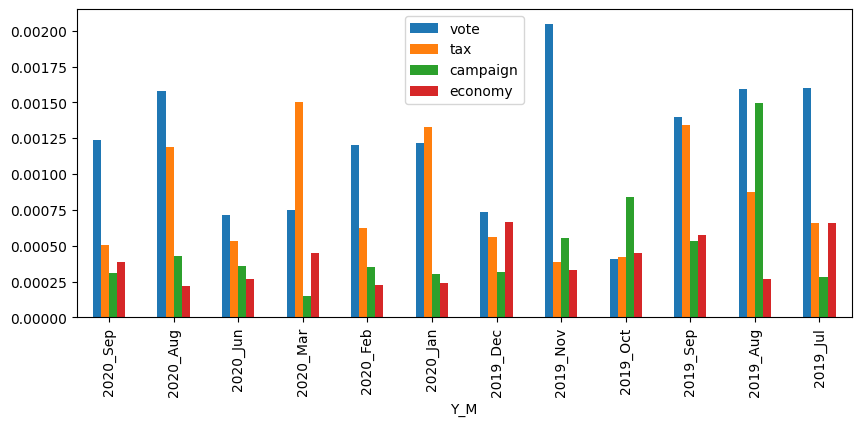

In [45]:
vis_df[column_order].loc[row_order].plot.bar(figsize = (10,4))